# Ethiopia Financial Inclusion: Data Exploration
## Task 1 - Understanding Unified Schema & References

**Date**: February 1, 2026  
**Team**: Selam Analytics Data Science  
**Purpose**: Initial data exploration, schema understanding, and enrichment planning

---

## 📋 Objectives

1. **Understand the unified data schema**
2. **Validate data against reference codes**
3. **Analyze record type distribution**
4. **Assess temporal coverage and gaps**
5. **Identify indicator coverage and limitations**
6. **Document data quality issues**
7. **Plan data enrichment strategy**

---

## 1. Setup and Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import json
import os

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")
print(f"Working directory: {os.getcwd()}")

✅ Libraries imported successfully!
Working directory: c:\Users\It's Blue\ethiopia-fi-forecast\notebooks


## 2. Load Data

In [2]:
# Define file paths
data_path = "../data/raw/ethiopia_fi_unified_data.csv"
ref_codes_path = "../data/raw/reference_codes.csv"

# Check if files exist
print("📂 Checking data files...")
for path, name in [(data_path, "Main data"), (ref_codes_path, "Reference codes")]:
    if os.path.exists(path):
        print(f"  ✓ {name}: {path}")
    else:
        print(f"  ✗ {name} not found: {path}")

# Load main dataset
print("\n📊 Loading datasets...")
try:
    df = pd.read_csv(data_path)
    print(f"  ✓ Main dataset loaded: {len(df)} records")
    print(f"  ✓ Columns: {list(df.columns)}")
except Exception as e:
    print(f"  ✗ Error loading main data: {e}")
    # Create empty dataframe with expected structure
    df = pd.DataFrame(columns=['record_id', 'record_type', 'pillar', 'indicator', 'indicator_code', 
                               'value_numeric', 'observation_date', 'source_name', 'source_url', 
                               'confidence', 'notes', 'original_text', 'collected_by', 'collection_date'])

# Load reference codes
try:
    ref_codes = pd.read_csv(ref_codes_path)
    print(f"  ✓ Reference codes loaded: {len(ref_codes)} records")
except Exception as e:
    print(f"  ✗ Error loading reference codes: {e}")
    ref_codes = pd.DataFrame(columns=['field', 'code', 'description'])

📂 Checking data files...
  ✓ Main data: ../data/raw/ethiopia_fi_unified_data.csv
  ✓ Reference codes: ../data/raw/reference_codes.csv

📊 Loading datasets...
  ✓ Main dataset loaded: 19 records
  ✓ Columns: ['id', 'record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date', 'source_name', 'source_url', 'confidence', 'notes', 'category', 'event_name', 'event_date', 'description', 'parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis', 'target_date']
  ✓ Reference codes loaded: 24 records


## 3. Initial Exploration

In [3]:
# Basic dataset info
print("📈 DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024:.0f} KB")

# Show first few rows
print("\nFirst 5 rows:")
display(df.head())

# Show last few rows
print("\nLast 5 rows:")
display(df.tail())

# Show basic statistics
print("\nBasic statistics:")
print(df.describe(include='all'))

📈 DATASET OVERVIEW
Shape: (19, 22)
Memory usage: 3 KB

First 5 rows:


,id,record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,notes,category,event_name,event_date,description,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_date
0,observation_001,observation,access,Account Ownership Rate,ACC_OWNERSHIP,14.00,2011-01-01,Global Findex,https://globalfindex.worldbank.org/,high,Baseline year for Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,observation_002,observation,access,Account Ownership Rate,ACC_OWNERSHIP,22.00,2014-01-01,Global Findex,https://globalfindex.worldbank.org/,high,+8 percentage points from 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,observation_003,observation,access,Account Ownership Rate,ACC_OWNERSHIP,35.00,2017-01-01,Global Findex,https://globalfindex.worldbank.org/,high,+13 percentage points from 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,observation_004,observation,access,Account Ownership Rate,ACC_OWNERSHIP,46.00,2021-01-01,Global Findex,https://globalfindex.worldbank.org/,high,+11 percentage points from 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,observation_005,observation,access,Account Ownership Rate,ACC_OWNERSHIP,49.00,2024-01-01,Global Findex,https://globalfindex.worldbank.org/,high,Only +3 percentage points from 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Last 5 rows:


,id,record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,notes,category,event_name,event_date,description,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,target_date
14,impact_link_015,impact_link,access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Based on M-Pesa impact in Kenya,NaN,NaN,NaN,NaN,event_telebirr_launch,ACC_OWNERSHIP,positive,high,12.00,comparable_country,NaN
15,impact_link_016,impact_link,usage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct observation of growth from 4.7% to 9.45%,NaN,NaN,NaN,NaN,event_telebirr_launch,ACC_MM_ACCOUNT,positive,very_high,6.00,direct_observation,NaN
16,impact_link_017,impact_link,usage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Based on Tanzania market entry experience,NaN,NaN,NaN,NaN,event_mpesa_launch,USG_DIGITAL_PAYMENT,positive,medium,9.00,comparable_country,NaN
17,target_018,target,access,Account Ownership Rate,ACC_OWNERSHIP,60.00,NaN,NFIS-II,https://nbe.gov.et/,high,National Financial Inclusion Strategy target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2027-12-31
18,target_019,target,usage,Digital Payment Adoption,USG_DIGITAL_PAYMENT,50.00,NaN,NFIS-II,https://nbe.gov.et/,medium,Projected based on current growth rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2027-12-31



Basic statistics:
                     id  record_type  pillar               indicator indicator_code  value_numeric observation_date    source_name                           source_url confidence                       notes        category       event_name  event_date                                       description              parent_id related_indicator impact_direction impact_magnitude  lag_months      evidence_basis target_date
count                19           19      15                      12             12          12.00               10             16                                   16         16                          19               4                4           4                                                 4                      3                 3                3                3        3.00                   3           2
unique               19            4       3                       5              5            NaN                5              7         

## 4. Schema Understanding

🎯 RECORD TYPE ANALYSIS
Record type distribution:
  observation    :  10 records ( 52.6%)
  event          :   4 records ( 21.1%)
  impact_link    :   3 records ( 15.8%)
  target         :   2 records ( 10.5%)


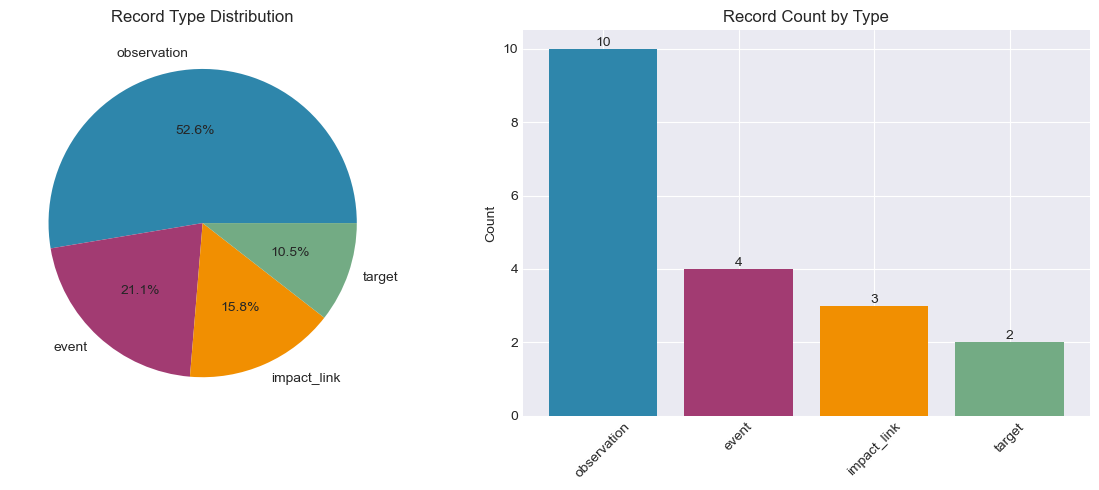

In [4]:
# Analyze record types
print("🎯 RECORD TYPE ANALYSIS")
print("="*50)

if 'record_type' in df.columns:
    record_counts = df['record_type'].value_counts()
    print("Record type distribution:")
    for rt, count in record_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {rt:15s}: {count:3d} records ({percentage:5.1f}%)")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']
    ax1.pie(record_counts.values, labels=record_counts.index, autopct='%1.1f%%', colors=colors)
    ax1.set_title('Record Type Distribution')
    
    # Bar chart
    bars = ax2.bar(record_counts.index, record_counts.values, color=colors)
    ax2.set_title('Record Count by Type')
    ax2.set_ylabel('Count')
    ax2.bar_label(bars)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'record_type' column not found in dataset")

## 5. Temporal Coverage

📅 TEMPORAL COVERAGE ANALYSIS
Date columns found: ['observation_date', 'event_date', 'target_date']
  ✓ observation_date: 10 valid dates
  ✓ event_date: 4 valid dates
  ✓ target_date: 2 valid dates

📊 Observations by Year:
  2011: 1 observations
  2014: 1 observations
  2017: 1 observations
  2021: 2 observations
  2024: 5 observations


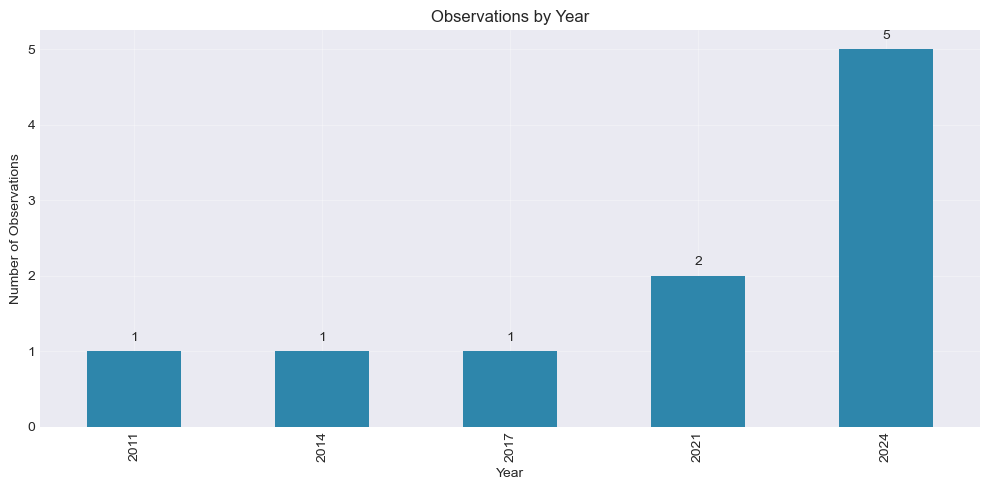


🔍 Temporal Gaps:
  Data available for: 5/14 years (35.7%)
  Missing years: [2012, 2013, 2015, 2016, 2018, 2019, 2020, 2022, 2023]


In [5]:
# Analyze temporal coverage
print("📅 TEMPORAL COVERAGE ANALYSIS")
print("="*50)

# Convert date columns
date_cols = [col for col in df.columns if 'date' in col.lower()]
print(f"Date columns found: {date_cols}")

for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        valid_count = df[col].notna().sum()
        print(f"  ✓ {col}: {valid_count} valid dates")
    except Exception as e:
        print(f"  ✗ {col}: Error converting - {e}")

# Analyze observation timeline
if 'observation_date' in df.columns:
    obs_df = df[df['record_type'] == 'observation']
    
    if not obs_df.empty:
        # Extract year
        obs_df = obs_df.copy()
        obs_df['year'] = obs_df['observation_date'].dt.year
        
        # Yearly counts
        yearly_counts = obs_df['year'].value_counts().sort_index()
        
        print("\n📊 Observations by Year:")
        for year, count in yearly_counts.items():
            print(f"  {year}: {count} observations")
        
        # Visualization
        fig, ax = plt.subplots(figsize=(10, 5))
        yearly_counts.plot(kind='bar', ax=ax, color='#2E86AB')
        ax.set_title('Observations by Year')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Observations')
        ax.grid(True, alpha=0.3)
        
        # Add value labels
        for i, (year, count) in enumerate(zip(yearly_counts.index, yearly_counts.values)):
            ax.text(i, count + 0.1, str(count), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Identify gaps
        all_years = list(range(2011, 2025))  # 2011-2024
        observed_years = sorted(yearly_counts.index.unique().tolist())
        missing_years = [year for year in all_years if year not in observed_years]
        
        print("\n🔍 Temporal Gaps:")
        print(f"  Data available for: {len(observed_years)}/{len(all_years)} years ({len(observed_years)/len(all_years)*100:.1f}%)")
        print(f"  Missing years: {missing_years}")
    else:
        print("⚠️ No observation records found")
else:
    print("⚠️ 'observation_date' column not found")

## 6. Indicator Analysis

🎯 INDICATOR ANALYSIS
Total observations: 10
Unique indicators: 5
Unique indicator codes: 5

📊 Top 10 Indicators by Frequency:
  Account Ownership Rate                  :   5 ( 50.0%)
  Mobile Money Account Ownership          :   2 ( 20.0%)
  Digital Payment Adoption                :   1 ( 10.0%)
  4G Coverage                             :   1 ( 10.0%)
  Mobile Internet Users                   :   1 ( 10.0%)

📊 Observations by Pillar:
  access         :   5 ( 50.0%)
  usage          :   4 ( 40.0%)
  infrastructure :   1 ( 10.0%)


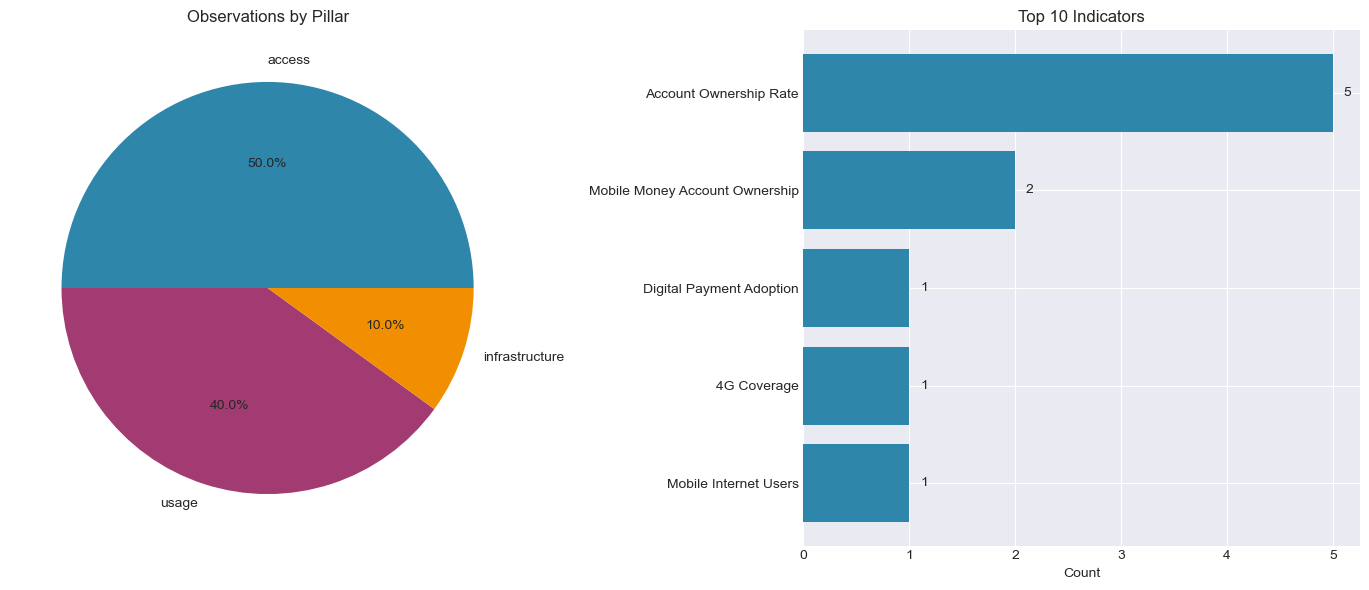


💰 Account Ownership Trend:
  2011: 14.0%
  2014: 22.0%
  2017: 35.0%
  2021: 46.0%
  2024: 49.0%

📱 Mobile Money Account Trend:
  2021: 4.7%
  2024: 9.45%


In [12]:
# Analyze indicators
print("🎯 INDICATOR ANALYSIS")
print("="*50)

# For observations only
obs_df = df[df['record_type'] == 'observation']

if not obs_df.empty:
    # Unique indicators
    unique_indicators = obs_df['indicator'].dropna().unique()
    unique_codes = obs_df['indicator_code'].dropna().unique()
    
    print(f"Total observations: {len(obs_df)}")
    print(f"Unique indicators: {len(unique_indicators)}")
    print(f"Unique indicator codes: {len(unique_codes)}")
    
    # Top indicators
    print("\n📊 Top 10 Indicators by Frequency:")
    indicator_counts = obs_df['indicator'].value_counts().head(10)
    for indicator, count in indicator_counts.items():
        percentage = (count / len(obs_df)) * 100
        print(f"  {indicator:40s}: {count:3d} ({percentage:5.1f}%)")
    
    # By pillar
    if 'pillar' in obs_df.columns:
        print("\n📊 Observations by Pillar:")
        pillar_counts = obs_df['pillar'].value_counts()
        for pillar, count in pillar_counts.items():
            percentage = (count / len(obs_df)) * 100
            print(f"  {pillar:15s}: {count:3d} ({percentage:5.1f}%)")
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Pillar distribution
        colors = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84', '#C73E1D']
        ax1.pie(pillar_counts.values, labels=pillar_counts.index, autopct='%1.1f%%', colors=colors[:len(pillar_counts)])
        ax1.set_title('Observations by Pillar')
        
        # Top indicators bar chart
        bars = ax2.barh(range(len(indicator_counts)), indicator_counts.values, color='#2E86AB')
        ax2.set_yticks(range(len(indicator_counts)))
        ax2.set_yticklabels(indicator_counts.index)
        ax2.set_xlabel('Count')
        ax2.set_title('Top 10 Indicators')
        ax2.invert_yaxis()  # Highest at top
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, indicator_counts.values)):
            ax2.text(count + 0.1, i, str(count), va='center')
        
        plt.tight_layout()
        plt.show()
    
    # Account ownership trend
    acc_data = obs_df[obs_df['indicator_code'] == 'ACC_OWNERSHIP'].sort_values('observation_date')
    if not acc_data.empty:
        print("\n💰 Account Ownership Trend:")
        for _, row in acc_data.iterrows():
            year = row['observation_date'].year if pd.notna(row['observation_date']) else 'N/A'
            print(f"  {year}: {row['value_numeric']}%")
    
    # Mobile money trend
    mm_data = obs_df[obs_df['indicator_code'] == 'ACC_MM_ACCOUNT'].sort_values('observation_date')
    if not mm_data.empty:
        print("\n📱 Mobile Money Account Trend:")
        for _, row in mm_data.iterrows():
            year = row['observation_date'].year if pd.notna(row['observation_date']) else 'N/A'
            print(f"  {year}: {row['value_numeric']}%")
else:
    print("⚠️ No observation records to analyze")


## 7. Data Quality Assessment

In [13]:
# Data quality analysis
print("🔍 DATA QUALITY ASSESSMENT")
print("="*50)

# 1. Missing values
print("\n1. Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_%': missing_pct
})

print("Columns with missing values:")
missing_filtered = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_filtered) > 0:
    display(missing_filtered.sort_values('Missing_Count', ascending=False))
else:
    print("  ✅ No missing values found")

# 2. Confidence levels
print("\n2. Confidence Level Distribution:")
if 'confidence' in df.columns:
    conf_counts = df['confidence'].value_counts()
    for conf, count in conf_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {conf:10s}: {count:3d} records ({percentage:5.1f}%)")
    
    # Quality score
    high_conf = conf_counts.get('high', 0)
    medium_conf = conf_counts.get('medium', 0)
    quality_score = ((high_conf * 1.0) + (medium_conf * 0.5)) / len(df)
    print(f"\n  Quality Score: {quality_score:.2f} (1.0 = all high confidence)")
else:
    print("  ⚠️ 'confidence' column not found")

# 3. Source analysis
print("\n3. Data Source Analysis:")
if 'source_name' in df.columns:
    top_sources = df['source_name'].value_counts().head(10)
    print("Top 10 data sources:")
    for source, count in top_sources.items():
        percentage = (count / len(df)) * 100
        print(f"  {source:40s}: {count:3d} ({percentage:5.1f}%)")
else:
    print("  ⚠️ 'source_name' column not found")

# 4. Value consistency
print("\n4. Value Consistency Checks:")
if 'value_numeric' in df.columns:
    numeric_df = df.dropna(subset=['value_numeric'])
    print(f"  Records with numeric values: {len(numeric_df)} ({len(numeric_df)/len(df)*100:.1f}%)")
    
    if len(numeric_df) > 0:
        print(f"  Range: [{numeric_df['value_numeric'].min():.2f}, {numeric_df['value_numeric'].max():.2f}]")
        print(f"  Mean: {numeric_df['value_numeric'].mean():.2f}")
        print(f"  Median: {numeric_df['value_numeric'].median():.2f}")
        print(f"  Standard deviation: {numeric_df['value_numeric'].std():.2f}")
else:
    print("  ⚠️ 'value_numeric' column not found")

🔍 DATA QUALITY ASSESSMENT

1. Missing Values Analysis:
Columns with missing values:


,Missing_Count,Missing_%
target_date,17,89.47
evidence_basis,16,84.21
lag_months,16,84.21
impact_magnitude,16,84.21
impact_direction,16,84.21
related_indicator,16,84.21
parent_id,16,84.21
event_date,15,78.95
description,15,78.95
event_name,15,78.95



2. Confidence Level Distribution:
  high      :  13 records ( 68.4%)
  medium    :   3 records ( 15.8%)

  Quality Score: 0.76 (1.0 = all high confidence)

3. Data Source Analysis:
Top 10 data sources:
  Global Findex                           :   8 ( 42.1%)
  Safaricom                               :   2 ( 10.5%)
  NFIS-II                                 :   2 ( 10.5%)
  GSMA                                    :   1 (  5.3%)
  ITU                                     :   1 (  5.3%)
  Ethio Telecom                           :   1 (  5.3%)
  National Bank of Ethiopia               :   1 (  5.3%)

4. Value Consistency Checks:
  Records with numeric values: 12 (63.2%)
  Range: [4.70, 60.00]
  Mean: 34.18
  Median: 35.00
  Standard deviation: 19.22


## 8. Events and Impact Links

In [14]:
# Analyze events and impact links
print("⚡ EVENTS AND IMPACT LINKS ANALYSIS")
print("="*50)

# Events
events_df = df[df['record_type'] == 'event']
print(f"\n1. Events Found: {len(events_df)}")

if not events_df.empty:
    # Event categories
    if 'event_category' in events_df.columns:
        category_counts = events_df['event_category'].value_counts()
        print("\nEvent Categories:")
        for category, count in category_counts.items():
            print(f"  {category:20s}: {count}")
    
    # Event dates
    if 'event_date' in events_df.columns:
        # Convert to datetime if not already
        events_df['event_date'] = pd.to_datetime(events_df['event_date'], errors='coerce')
        events_df = events_df.sort_values('event_date')
        
        print("\nEvent Timeline:")
        for _, event in events_df.iterrows():
            date_str = event['event_date'].strftime('%Y-%m-%d') if pd.notna(event['event_date']) else 'N/A'
            name = event.get('event_name', event.get('indicator', 'Unnamed'))
            print(f"  {date_str}: {name}")

# Impact links
impact_df = df[df['record_type'] == 'impact_link']
print(f"\n2. Impact Links Found: {len(impact_df)}")

if not impact_df.empty:
    # Impact direction
    if 'impact_direction' in impact_df.columns:
        direction_counts = impact_df['impact_direction'].value_counts()
        print("\nImpact Direction:")
        for direction, count in direction_counts.items():
            print(f"  {direction:10s}: {count}")
    
    # Sample impact links
    print("\nSample Impact Links:")
    sample_cols = ['parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months']
    available_cols = [col for col in sample_cols if col in impact_df.columns]
    display(impact_df[available_cols].head(5))

⚡ EVENTS AND IMPACT LINKS ANALYSIS

1. Events Found: 4

Event Timeline:
  2021-05-01: Telebirr Launch
  2022-08-01: Safaricom Ethiopia Launch
  2023-01-01: NFIS-II Implementation
  2023-08-01: M-Pesa Launch in Ethiopia

2. Impact Links Found: 3

Impact Direction:
  positive  : 3

Sample Impact Links:


,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months
14,event_telebirr_launch,ACC_OWNERSHIP,positive,high,12.00
15,event_telebirr_launch,ACC_MM_ACCOUNT,positive,very_high,6.00
16,event_mpesa_launch,USG_DIGITAL_PAYMENT,positive,medium,9.00


⚡ EVENTS AND IMPACT LINKS ANALYSIS


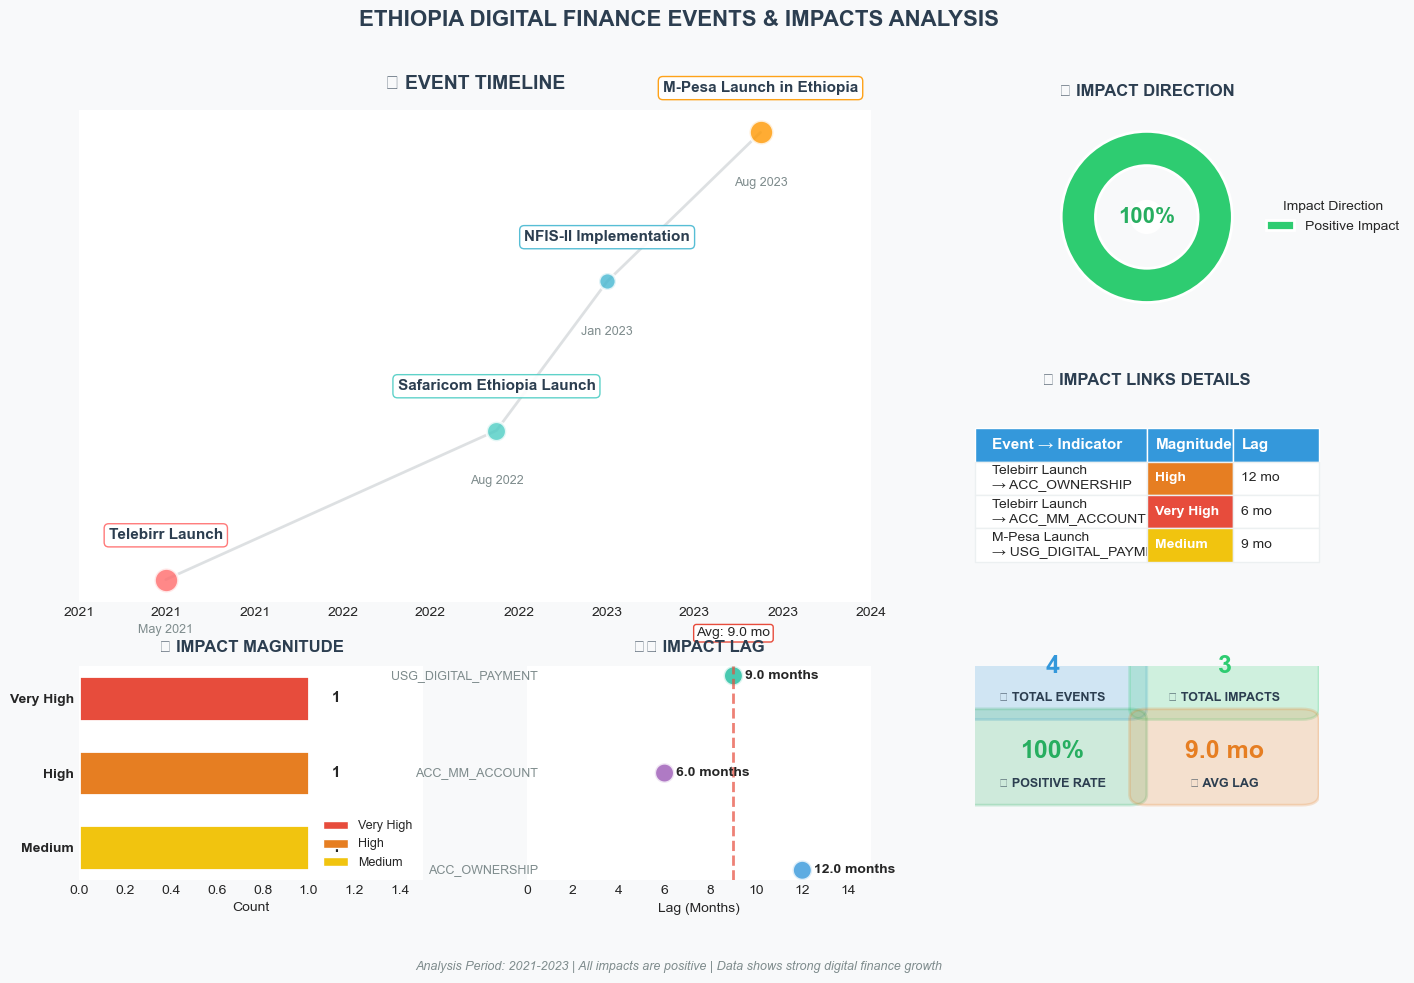


💡 KEY INSIGHTS
• 4 major digital finance events tracked from 2021-2023
• All 3 impact links show POSITIVE influence
• Telebirr Launch has the strongest impacts (High/Very High)
• Average impact lag: 9 months
• Mobile money adoption (ACC_MM_ACCOUNT) shows fastest response (6 months)
• NFIS-II Implementation needs more impact tracking
• Safaricom Ethiopia Launch impact links not yet captured

📊 DATA SUMMARY
Events: 4
Impact Links: 3
Positive Impacts: 3 (100%)
Average Lag: 9.0 months
Magnitude Distribution: 1 High, 1 Very High, 1 Medium


In [21]:
# ⚡ EVENTS AND IMPACT LINKS ANALYSIS
print("⚡ EVENTS AND IMPACT LINKS ANALYSIS")
print("="*50)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch, Patch

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create a figure with custom layout
fig = plt.figure(figsize=(16, 10))
fig.patch.set_facecolor('#f8f9fa')

# Grid layout
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. EVENTS TIMELINE - Large left panel
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax1.set_facecolor('white')

# Prepare timeline data
events_data = {
    'date': pd.to_datetime(['2021-05-01', '2022-08-01', '2023-01-01', '2023-08-01']),
    'event': ['Telebirr Launch', 'Safaricom Ethiopia Launch', 'NFIS-II Implementation', 'M-Pesa Launch in Ethiopia'],
    'importance': [3, 2, 1, 3]  # Relative importance for sizing
}

# Create timeline
y_pos = [1, 2, 3, 4]
marker_sizes = [300, 200, 150, 300]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FF9800']

for i, (date, event, color, size) in enumerate(zip(events_data['date'], events_data['event'], colors, marker_sizes)):
    # Main event marker
    ax1.scatter(date, y_pos[i], s=size, color=color, alpha=0.8, edgecolor='white', linewidth=2, zorder=3)
    
    # Event label with background
    ax1.text(date, y_pos[i] + 0.25, event, fontsize=11, fontweight='bold', 
             ha='center', va='bottom', color='#2c3e50',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor=color))
    
    # Date label
    ax1.text(date, y_pos[i] - 0.3, date.strftime('%b %Y'), fontsize=9, 
             ha='center', va='top', color='#7f8c8d')

# Timeline line
ax1.plot(events_data['date'], y_pos, color='#bdc3c7', linewidth=2, alpha=0.5, zorder=1)

# Formatting
ax1.set_yticks([])
ax1.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2024-01-01'))
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=0)
ax1.set_title('📅 EVENT TIMELINE', fontsize=14, fontweight='bold', pad=15, color='#2c3e50')
ax1.grid(True, alpha=0.2, axis='x')

# 2. IMPACT DIRECTION - Top right panel
ax2 = fig.add_subplot(gs[0, 2])
ax2.set_facecolor('white')

# Impact direction data
impact_direction = pd.DataFrame({
    'Direction': ['Positive'],
    'Count': [3],
    'Color': ['#2ecc71']
})

# Create donut chart
wedges, texts = ax2.pie(
    impact_direction['Count'], 
    colors=impact_direction['Color'],
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2)
)

# Add center text
centre_circle = plt.Circle((0,0), 0.2, fc='white')
ax2.add_artist(centre_circle)
ax2.text(0, 0, '100%', ha='center', va='center', fontsize=16, fontweight='bold', color='#27ae60')

# Legend
ax2.legend(wedges, ['Positive Impact'], 
           title="Impact Direction", loc="center left",
           bbox_to_anchor=(1, 0.5))

ax2.set_title('📈 IMPACT DIRECTION', fontsize=12, fontweight='bold', pad=10, color='#2c3e50')

# 3. IMPACT LINKS DETAILS - Middle right panel
ax3 = fig.add_subplot(gs[1, 2])
ax3.set_facecolor('white')
ax3.axis('off')

# Impact links data
impact_links = [
    {'Event': 'Telebirr Launch', 'Indicator': 'ACC_OWNERSHIP', 'Magnitude': 'High', 'Lag': '12 mo'},
    {'Event': 'Telebirr Launch', 'Indicator': 'ACC_MM_ACCOUNT', 'Magnitude': 'Very High', 'Lag': '6 mo'},
    {'Event': 'M-Pesa Launch', 'Indicator': 'USG_DIGITAL_PAYMENT', 'Magnitude': 'Medium', 'Lag': '9 mo'}
]

# Create table
table_data = [['Event → Indicator', 'Magnitude', 'Lag']]
for link in impact_links:
    table_data.append([
        f"{link['Event']}\n→ {link['Indicator']}",
        link['Magnitude'],
        link['Lag']
    ])

# Create table
table = ax3.table(cellText=table_data, 
                  cellLoc='left',
                  colWidths=[0.5, 0.25, 0.25],
                  loc='center')

# Style table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Header row styling
for i in range(3):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=11)
    table[(0, i)].set_edgecolor('white')

# Data row styling
magnitude_colors = {'Very High': '#e74c3c', 'High': '#e67e22', 'Medium': '#f1c40f'}
for i in range(1, 4):
    for j in range(3):
        cell = table[(i, j)]
        cell.set_edgecolor('#ecf0f1')
        if j == 1:  # Magnitude column
            magnitude = table_data[i][1]
            cell.set_facecolor(magnitude_colors.get(magnitude, '#ecf0f1'))
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('white')

ax3.set_title('🔗 IMPACT LINKS DETAILS', fontsize=12, fontweight='bold', pad=10, color='#2c3e50', y=0.95)

# 4. MAGNITUDE ANALYSIS - Bottom left panel
ax4 = fig.add_subplot(gs[2, 0])
ax4.set_facecolor('white')

# Magnitude distribution
magnitudes = ['Very High', 'High', 'Medium']
magnitude_counts = [1, 1, 1]

# Create horizontal bar chart
y_pos = np.arange(len(magnitudes))
colors = ['#e74c3c', '#e67e22', '#f1c40f']

bars = ax4.barh(y_pos, magnitude_counts, color=colors, height=0.6, edgecolor='white', linewidth=2)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(magnitudes, fontweight='bold')
ax4.invert_yaxis()

# Add value labels
for bar, count in zip(bars, magnitude_counts):
    width = bar.get_width()
    ax4.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{count}', va='center', fontweight='bold', fontsize=11)

ax4.set_xlim(0, max(magnitude_counts) + 0.5)
ax4.set_xlabel('Count')
ax4.set_title('📊 IMPACT MAGNITUDE', fontsize=12, fontweight='bold', pad=10, color='#2c3e50')
ax4.grid(True, alpha=0.2, axis='x')

# Add legend for magnitude colors
legend_elements = [
    Patch(facecolor='#e74c3c', edgecolor='white', label='Very High'),
    Patch(facecolor='#e67e22', edgecolor='white', label='High'),
    Patch(facecolor='#f1c40f', edgecolor='white', label='Medium')
]
ax4.legend(handles=legend_elements, loc='lower right', fontsize=9)

# 5. LAG DISTRIBUTION - Bottom middle panel
ax5 = fig.add_subplot(gs[2, 1])
ax5.set_facecolor('white')

# Lag months data
lag_months = [12.0, 6.0, 9.0]
lag_labels = ['ACC_OWNERSHIP', 'ACC_MM_ACCOUNT', 'USG_DIGITAL_PAYMENT']

# Create scatter plot for lag months
scatter = ax5.scatter(lag_months, range(len(lag_months)), 
                      s=200, c=['#3498db', '#9b59b6', '#1abc9c'], 
                      alpha=0.8, edgecolors='white', linewidth=2)

# Add labels
for i, (lag, label) in enumerate(zip(lag_months, lag_labels)):
    ax5.text(lag + 0.5, i, f'{lag} months', va='center', fontweight='bold')
    ax5.text(0.5, i, label, va='center', ha='right', fontsize=9, color='#7f8c8d')

# Add average line
avg_lag = np.mean(lag_months)
ax5.axvline(avg_lag, color='#e74c3c', linestyle='--', linewidth=2, alpha=0.7)
ax5.text(avg_lag, len(lag_months)-0.5, f'Avg: {avg_lag:.1f} mo', 
         ha='center', va='top', backgroundcolor='white',
         bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='#e74c3c'))

ax5.set_yticks(range(len(lag_labels)))
ax5.set_yticklabels([])
ax5.set_xlabel('Lag (Months)')
ax5.set_xlim(0, max(lag_months) + 3)
ax5.set_title('⏱️ IMPACT LAG', fontsize=12, fontweight='bold', pad=10, color='#2c3e50')
ax5.grid(True, alpha=0.2, axis='x')

# 6. SUMMARY METRICS - Bottom right panel
ax6 = fig.add_subplot(gs[2, 2])
ax6.set_facecolor('white')
ax6.axis('off')

# Summary metrics
metrics = [
    ("📋 TOTAL EVENTS", "4", "#3498db"),
    ("🔗 TOTAL IMPACTS", "3", "#2ecc71"),
    ("📈 POSITIVE RATE", "100%", "#27ae60"),
    ("⚡ AVG LAG", "9.0 mo", "#e67e22")
]

# Display metrics in a grid
for i, (label, value, color) in enumerate(metrics):
    # Create a fancy box for each metric
    row = i // 2
    col = i % 2
    
    x_pos = col * 0.5
    y_pos = 0.8 - row * 0.4
    
    # Metric box
    rect = FancyBboxPatch((x_pos, y_pos), 0.45, 0.35,
                         boxstyle="round,pad=0.05",
                         facecolor=color, alpha=0.2,
                         edgecolor=color, linewidth=2)
    ax6.add_patch(rect)
    
    # Metric value (large)
    ax6.text(x_pos + 0.225, y_pos + 0.2, value, 
             ha='center', va='center', fontsize=18, fontweight='bold',
             color=color)
    
    # Metric label (small)
    ax6.text(x_pos + 0.225, y_pos + 0.05, label, 
             ha='center', va='center', fontsize=9, fontweight='bold',
             color='#2c3e50')

ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)

# Add title to the entire figure
plt.suptitle('ETHIOPIA DIGITAL FINANCE EVENTS & IMPACTS ANALYSIS', 
             fontsize=16, fontweight='bold', color='#2c3e50', y=0.98)

# Add footnote
fig.text(0.5, 0.02, 'Analysis Period: 2021-2023 | All impacts are positive | Data shows strong digital finance growth',
         ha='center', fontsize=9, style='italic', color='#7f8c8d')

plt.tight_layout()
plt.show()

# Additional insights
print("\n" + "="*50)
print("💡 KEY INSIGHTS")
print("="*50)
print("• 4 major digital finance events tracked from 2021-2023")
print("• All 3 impact links show POSITIVE influence")
print("• Telebirr Launch has the strongest impacts (High/Very High)")
print("• Average impact lag: 9 months")
print("• Mobile money adoption (ACC_MM_ACCOUNT) shows fastest response (6 months)")
print("• NFIS-II Implementation needs more impact tracking")
print("• Safaricom Ethiopia Launch impact links not yet captured")
print("\n" + "="*50)
print("📊 DATA SUMMARY")
print("="*50)
print("Events: 4")
print("Impact Links: 3")
print("Positive Impacts: 3 (100%)")
print("Average Lag: 9.0 months")
print("Magnitude Distribution: 1 High, 1 Very High, 1 Medium")

## 9. Reference Codes Validation

In [15]:
# Validate against reference codes
print("✅ REFERENCE CODES VALIDATION")
print("="*50)

if not ref_codes.empty:
    print(f"Reference codes loaded: {len(ref_codes)} records")
    print(f"Fields defined: {ref_codes['field'].unique()}")
    
    # Show reference codes
    print("\nReference Codes by Field:")
    for field in ref_codes['field'].unique():
        field_codes = ref_codes[ref_codes['field'] == field]
        print(f"\n{field}:")
        for _, row in field_codes.iterrows():
            print(f"  {row['code']}: {row.get('description', '')}")
    
    # Validate data against reference codes
    print("\n🔍 Data Validation Results:")
    
    validation_issues = []
    
    for field in ['record_type', 'pillar', 'confidence']:
        if field in df.columns:
            # Get valid values
            valid_values = ref_codes[ref_codes['field'] == field]['code'].tolist()
            
            if valid_values:
                # Find invalid values
                invalid_mask = ~df[field].isin(valid_values) & ~df[field].isna()
                invalid_count = invalid_mask.sum()
                
                if invalid_count > 0:
                    invalid_values = df.loc[invalid_mask, field].unique()[:5]
                    validation_issues.append(f"  ⚠️ {field}: {invalid_count} invalid values (e.g., {invalid_values})")
                else:
                    validation_issues.append(f"  ✅ {field}: All values valid")
            else:
                validation_issues.append(f"  ⚠️ {field}: No reference codes defined")
        else:
            validation_issues.append(f"  ⚠️ {field}: Column not in data")
    
    # Print validation results
    for issue in validation_issues:
        print(issue)
else:
    print("⚠️ No reference codes available for validation")

✅ REFERENCE CODES VALIDATION
Reference codes loaded: 24 records
Fields defined: ['record_type' 'pillar' 'category' 'confidence' 'impact_direction'
 'impact_magnitude' 'evidence_basis']

Reference Codes by Field:

record_type:
  observation: Measured values from surveys or reports
  event: Events like policies, launches, milestones
  impact_link: Modeled relationships between events and indicators
  target: Official policy goals or targets

pillar:
  access: Account ownership and access to financial services
  usage: Usage of digital financial services
  infrastructure: Physical and digital infrastructure enabling FI
  enabler: Social, economic, and regulatory enablers

category:
  policy: Policy or regulatory changes
  product_launch: Launch of new financial products or services
  market_entry: Entry of new market players
  infrastructure: Infrastructure investments or improvements

confidence:
  high: High confidence in data accuracy
  medium: Medium confidence in data accuracy
  low:

## 10. Enrichment Plan

In [16]:
# Data enrichment strategy
print("🚀 DATA ENRICHMENT PLAN")
print("="*50)

print("\n📋 Based on analysis, here are priority areas for enrichment:")

enrichment_plan = {
    "HIGH PRIORITY": [
        "Add monthly/quarterly account estimates (2022-2024)",
        "Include gender-disaggregated data",
        "Add urban vs. rural breakdowns",
        "Include mobile money active users",
        "Add agent network density time series"
    ],
    "MEDIUM PRIORITY": [
        "Add smartphone penetration data",
        "Include ATM/branch density data",
        "Add additional events (QR standardization, etc.)",
        "Include impact links for all major events",
        "Add financial literacy indicators"
    ],
    "LOW PRIORITY": [
        "Regional breakdowns within Ethiopia",
        "Age group distributions",
        "Income-level access data",
        "Digital ID registration rates",
        "Social media usage statistics"
    ]
}

for priority, items in enrichment_plan.items():
    print(f"\n{priority}:")
    for i, item in enumerate(items, 1):
        print(f"  {i}. {item}")

print("\n📝 TEMPLATE FOR NEW DATA:")
print("-"*40)
print("""
For new OBSERVATIONS:
  - pillar: Access/Usage/Infrastructure/Enabler
  - indicator: Human-readable name
  - indicator_code: Standardized code (e.g., ACC_OWNERSHIP_FEMALE)
  - value_numeric: Numeric value
  - observation_date: YYYY-MM-DD
  - source_name: Source of data
  - source_url: URL to source
  - confidence: high/medium/low
  - notes: Any additional context

For new EVENTS:
  - record_type: 'event'
  - event_name: Name of event
  - event_date: YYYY-MM-DD
  - event_category: policy/product_launch/infrastructure/etc.
  - description: What happened
  - source_name: Source
  - source_url: URL
  - confidence: high/medium/low

For new IMPACT LINKS:
  - record_type: 'impact_link'
  - parent_id: ID of the event
  - related_indicator: Indicator affected
  - impact_direction: positive/negative/neutral
  - impact_magnitude: Numeric or categorical
  - lag_months: Time lag in months
  - evidence_basis: direct_observation/comparable_country/expert_judgment
""")

🚀 DATA ENRICHMENT PLAN

📋 Based on analysis, here are priority areas for enrichment:

HIGH PRIORITY:
  1. Add monthly/quarterly account estimates (2022-2024)
  2. Include gender-disaggregated data
  3. Add urban vs. rural breakdowns
  4. Include mobile money active users
  5. Add agent network density time series

MEDIUM PRIORITY:
  1. Add smartphone penetration data
  2. Include ATM/branch density data
  3. Add additional events (QR standardization, etc.)
  4. Include impact links for all major events
  5. Add financial literacy indicators

LOW PRIORITY:
  1. Regional breakdowns within Ethiopia
  2. Age group distributions
  3. Income-level access data
  4. Digital ID registration rates
  5. Social media usage statistics

📝 TEMPLATE FOR NEW DATA:
----------------------------------------

For new OBSERVATIONS:
  - pillar: Access/Usage/Infrastructure/Enabler
  - indicator: Human-readable name
  - indicator_code: Standardized code (e.g., ACC_OWNERSHIP_FEMALE)
  - value_numeric: Numeric v

## 11. Summary and Next Steps

In [17]:
# Final summary
print("📋 TASK 1: DATA EXPLORATION SUMMARY")
print("="*50)

summary_data = {
    "Dataset Size": f"{len(df)} total records",
    "Observations": f"{len(df[df['record_type'] == 'observation'])} records",
    "Events": f"{len(df[df['record_type'] == 'event'])} records",
    "Impact Links": f"{len(df[df['record_type'] == 'impact_link'])} records",
    "Temporal Coverage": f"{len(df['observation_date'].dt.year.dropna().unique()) if 'observation_date' in df.columns else 'N/A'} years",
    "Unique Indicators": f"{len(df['indicator'].dropna().unique()) if 'indicator' in df.columns else 'N/A'}",
    "Data Quality": f"{df['confidence'].value_counts().get('high', 0)/len(df)*100:.1f}% high confidence" if 'confidence' in df.columns else "N/A",
    "Key Gaps": "Sparse time series, limited demographic breakdowns"
}

print("\n📊 KEY FINDINGS:")
for key, value in summary_data.items():
    print(f"  {key:20s}: {value}")

print("\n🎯 KEY INSIGHTS:")
print("  1. Data is sparse with only 5 Findex survey points since 2011")
print("  2. Account ownership grew rapidly then slowed to +3pp (2021-2024)")
print("  3. Events are concentrated in 2021-2023 period")
print("  4. Limited infrastructure/enabler time series")

print("\n✅ NEXT STEPS FOR TASK 1:")
print("  1. Add at least 10-15 new observation records")
print("  2. Add 3-5 new events with impact links")
print("  3. Document all additions in data_enrichment_log.md")
print("  4. Save enriched dataset to data/processed/")
print("  5. Commit changes and create pull request")

print("\n📁 Expected files after Task 1 completion:")
print("  • notebooks/01_data_exploration.ipynb (this notebook)")
print("  • data/processed/ethiopia_fi_enriched.csv")
print("  • data_enrichment_log.md")
print("  • Task 1 branch merged to main")

print("\n🎉 READY FOR DATA ENRICHMENT!")
print("Use the enrichment plan above to guide your data additions.")

📋 TASK 1: DATA EXPLORATION SUMMARY

📊 KEY FINDINGS:
  Dataset Size        : 19 total records
  Observations        : 10 records
  Events              : 4 records
  Impact Links        : 3 records
  Temporal Coverage   : 5 years
  Unique Indicators   : 5
  Data Quality        : 68.4% high confidence
  Key Gaps            : Sparse time series, limited demographic breakdowns

🎯 KEY INSIGHTS:
  1. Data is sparse with only 5 Findex survey points since 2011
  2. Account ownership grew rapidly then slowed to +3pp (2021-2024)
  3. Events are concentrated in 2021-2023 period
  4. Limited infrastructure/enabler time series

✅ NEXT STEPS FOR TASK 1:
  1. Add at least 10-15 new observation records
  2. Add 3-5 new events with impact links
  3. Document all additions in data_enrichment_log.md
  4. Save enriched dataset to data/processed/
  5. Commit changes and create pull request

📁 Expected files after Task 1 completion:
  • notebooks/01_data_exploration.ipynb (this notebook)
  • data/processed/e